<a href="https://colab.research.google.com/github/Sadhana-97/Cleanes_fake_news/blob/main/trader_behaviour_vs_bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
trades = pd.read_csv('/content/historical_data.csv')
fg = pd.read_csv('/content/fear_greed_index.csv')

In [4]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
fg['classification'].unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

In [9]:
trades.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [10]:
trades.shape

(211224, 16)

In [11]:
fg.info(), fg.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


(None, (2644, 4))

In [12]:
#2.Data Cleaning and Preprocessing
#Normalize column

trades.columns = trades.columns.str.strip().str.lower().str.replace(" ", "_")
fg.columns = fg.columns.str.strip().str.lower().str.replace(" ", "_")

print(trades.columns.tolist(), end="\n")
print(fg.columns.tolist())

['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp']
['timestamp', 'value', 'classification', 'date']


In [13]:
if 'timestamp_ist' in trades.columns:
    trades['timstamp_ist'] = pd.to_datetime(trades['timestamp'],errors = 'coerce')

In [14]:
if 'timestamp' in trades.columns:
    trades['timestamp'] = pd.to_numeric(trades['timestamp'], errors = 'coerce')

    trades['timestamp'] = trades['timestamp'].apply(
        lambda x: x/1000 if x > 1e12 else x # converting ms -> s
    )
    trades['timestamp'] = pd.to_datetime(trades['timestamp'], unit='s', errors = 'coerce')

In [15]:
trades['trade_time'] = trades['timestamp'].combine_first(trades['timestamp_ist'])

In [16]:
trades['trade_date'] = trades['trade_time'].dt.date

In [17]:
fg['timestamp'] = pd.to_datetime(fg['timestamp'], unit = 's')

In [18]:

fg['date'] = pd.to_datetime(fg['date'], errors = 'coerce').dt.date

In [19]:
fg.rename(columns={'value':'fg_value'}, inplace = True)

In [20]:
trades.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,timstamp_ist,trade_time,trade_date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-10-27 03:33:20,1970-01-01 00:28:50,2024-10-27 03:33:20,2024-10-27
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-10-27 03:33:20,1970-01-01 00:28:50,2024-10-27 03:33:20,2024-10-27
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-10-27 03:33:20,1970-01-01 00:28:50,2024-10-27 03:33:20,2024-10-27
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-10-27 03:33:20,1970-01-01 00:28:50,2024-10-27 03:33:20,2024-10-27
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-10-27 03:33:20,1970-01-01 00:28:50,2024-10-27 03:33:20,2024-10-27


In [21]:
fg.head()

,timestamp,fg_value,classification,date
0,2018-02-01 05:30:00,30,Fear,2018-02-01
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02
2,2018-02-03 05:30:00,40,Fear,2018-02-03
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05


In [22]:
#3.Merge Datasets
fg_clean = fg[['date', 'fg_value', 'classification']].copy()

In [23]:
#Merge both the dataframes ,many trades per day but a single fear_greed sentimnet per day

merged = trades.merge(
    fg_clean,
    left_on = 'trade_date',
    right_on = 'date',
    how = 'left'
)

In [24]:
merged.drop(columns= ['date'], inplace = True)

In [25]:
merged.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'timstamp_ist', 'trade_time', 'trade_date', 'fg_value',
       'classification'],
      dtype='object')

In [26]:
merged.shape

(211224, 21)

In [29]:
#4.feature engineering
fe = merged.copy()

fe['pnl_positive'] = (fe['closed_pnl'] > 0).astype(int)

fe['notional'] = fe['execution_price'] * fe['size_tokens']

fe['side'] = fe['side'].str.lower()
fe['direction_num'] = fe['side'].map({'buy':1, 'sell':-1})


# If direction column exists, override
if 'direction'in fe.columns:
    fe['direction'] = fe['direction'].astype(str).str.lower()
    fe['direction_num'] = fe['direction'].map({'long': 1, 'buy': 1, 'short': -1, 'sell': -1})


fe['classification'] = fe['classification'].astype(str)

# Clean sentiment bucket labels
fe['sentiment_bucket'] = (
    fe['classification']
        .str.lower()
        .str.replace(" ", "_")
)

fe['fg_scaled'] = fe['fg_value'] / 100

fe.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,...,timstamp_ist,trade_time,trade_date,fg_value,classification,pnl_positive,notional,direction_num,sentiment_bucket,fg_scaled
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,buy,02-12-2024 22:50,0.000000,buy,0.0,...,1970-01-01 00:28:50,2024-10-27 03:33:20,2024-10-27,74.0,Greed,0,7872.163303,1.0,greed,0.74
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,buy,02-12-2024 22:50,986.524596,buy,0.0,...,1970-01-01 00:28:50,2024-10-27 03:33:20,2024-10-27,74.0,Greed,0,127.680000,1.0,greed,0.74
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,buy,02-12-2024 22:50,1002.518996,buy,0.0,...,1970-01-01 00:28:50,2024-10-27 03:33:20,2024-10-27,74.0,Greed,0,1150.630695,1.0,greed,0.74
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,buy,02-12-2024 22:50,1146.558564,buy,0.0,...,1970-01-01 00:28:50,2024-10-27 03:33:20,2024-10-27,74.0,Greed,0,1142.038452,1.0,greed,0.74
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,buy,02-12-2024 22:50,1289.488521,buy,0.0,...,1970-01-01 00:28:50,2024-10-27 03:33:20,2024-10-27,74.0,Greed,0,69.747462,1.0,greed,0.74


#5.Aggregation
Creating aggregated datasets:

Per day → see how sentiment affects trading activity

Per account per day → analyze trader performance

Per sentiment bucket → compare Fear vs Neutral vs Greed

In [30]:
# Daily total metrics (across all accounts)

daily = fe.groupby('trade_date').agg(
    total_pnl = ('closed_pnl', 'sum'),
    avg_pnl = ('closed_pnl', 'mean'),
    num_trades = ('closed_pnl', 'size'),
    pos_trades = ('pnl_positive', 'sum'),
    fg_value = ('fg_value', 'mean'),
    sentiment = ('sentiment_bucket', lambda x: x.mode()[0] if len(x) > 0 else None)

).reset_index()

In [31]:
daily['win_rate'] = daily['pos_trades'] / daily['num_trades']

In [32]:
# Per account per day metrics
acct_daily = fe.groupby(['account', 'trade_date']).agg(
    total_pnl = ('closed_pnl', 'sum'),
    avg_pnl = ('closed_pnl', 'mean'),
    num_trades = ('closed_pnl', 'size'),
    pos_trades = ('pnl_positive', 'sum'),
    fg_value = ('fg_value', 'mean'),
    sentiment = ('sentiment_bucket', lambda x: x.mode()[0] if len(x) > 0 else None)
).reset_index()

In [33]:
acct_daily['win_rate'] = acct_daily['pos_trades'] / acct_daily['num_trades']

In [34]:
print('Daily Aggregation ')
display(daily.head())

Daily Aggregation 


,trade_date,total_pnl,avg_pnl,num_trades,pos_trades,fg_value,sentiment,win_rate
0,2023-03-28,0.000000e+00,0.000000,3,0,59.0,greed,0.000000
1,2023-11-14,1.555034e+02,0.148807,1045,287,69.0,greed,0.274641
2,2024-03-09,1.769655e+05,25.418772,6962,3412,84.0,extreme_greed,0.490089
3,2024-07-03,1.587424e+05,22.229713,7141,2265,50.0,neutral,0.317182
4,2024-10-27,3.189461e+06,90.504272,35241,15915,74.0,greed,0.451605


In [37]:
print("\nAccount Daily Aggregation:")
display(acct_daily.head())


Account Daily Aggregation:


,account,trade_date,total_pnl,avg_pnl,num_trades,pos_trades,fg_value,sentiment,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-3.275059e+05,-708.887230,462,12,74.0,greed,0.025974
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1.927736e+06,574.414696,3356,1361,44.0,fear,0.405542
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,2.060745e+04,64.398269,320,170,74.0,greed,0.531250
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,1.709873e+04,4.839719,3533,1537,44.0,fear,0.435041
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-06-15,1.017915e+04,2.970279,3427,1516,NaN,nan,0.442369


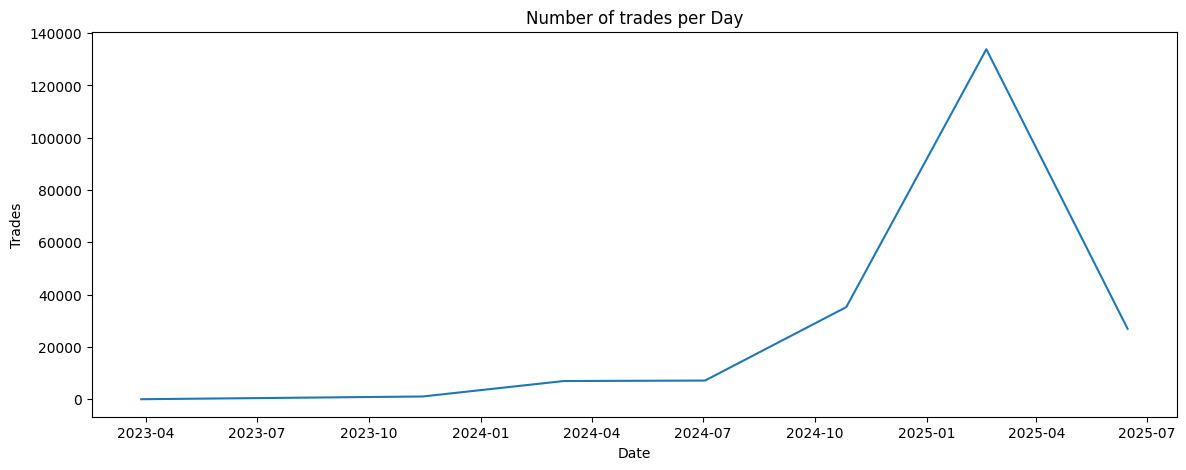

In [38]:
#6.EDA and Visulaizations

plt.figure(figsize = (14, 5))
plt.plot(daily['trade_date'], daily['num_trades'])
plt.title("Number of trades per Day")
plt.xlabel("Date")
plt.ylabel("Trades")

plt.show()

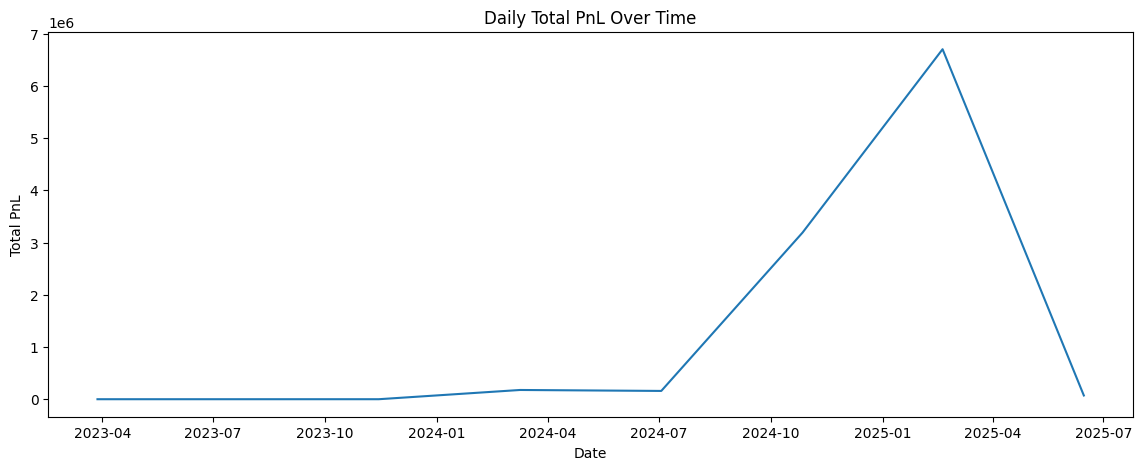

In [39]:
plt.figure(figsize=(14,5))
plt.plot(daily['trade_date'], daily['total_pnl'])
plt.title('Daily Total PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Total PnL')
plt.show()

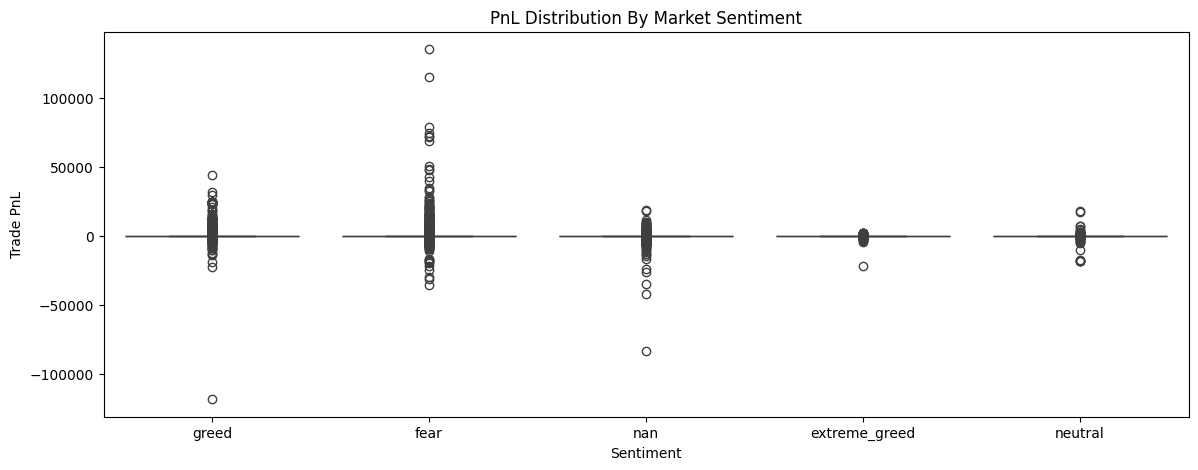

In [40]:
# Plot 3: Sentiment vs Average PnL - A boxplot to compare performance in Fear vs Neutral vs Greed.

plt.figure(figsize = (14,5))
sns.boxplot(data = fe, x = 'sentiment_bucket', y = 'closed_pnl')
plt.title('PnL Distribution By Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Trade PnL')
plt.show()

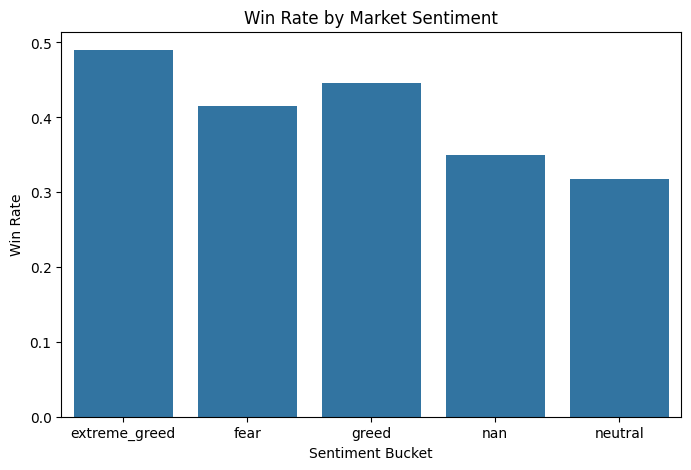

In [41]:
winrate_by_sentiment = fe.groupby('sentiment_bucket')['pnl_positive'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=winrate_by_sentiment, x='sentiment_bucket', y='pnl_positive')
plt.title("Win Rate by Market Sentiment")
plt.xlabel("Sentiment Bucket")
plt.ylabel("Win Rate")
plt.show()

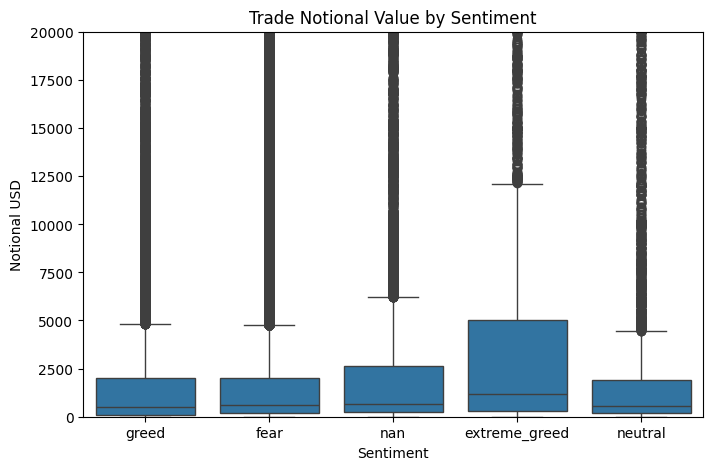

In [42]:
#Plot 5: Trade Size vs Sentiment

plt.figure(figsize=(8,5))
sns.boxplot(data=fe, x='sentiment_bucket', y='notional')
plt.title("Trade Notional Value by Sentiment")
plt.ylim(0, fe['notional'].quantile(0.95))  # trim outliers
plt.xlabel("Sentiment")
plt.ylabel("Notional USD")
plt.show()

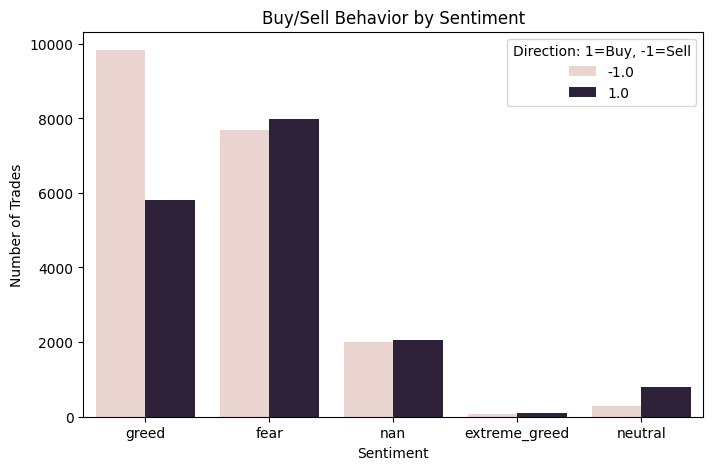

In [43]:
#Plot 6: Direction (Buy/Sell) vs Sentiment

plt.figure(figsize=(8,5))
sns.countplot(data=fe, x='sentiment_bucket', hue='direction_num')
plt.title("Buy/Sell Behavior by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.legend(title="Direction: 1=Buy, -1=Sell")
plt.show()

In [44]:
#7.statistical Insights & Analysis
winrate = fe.groupby('sentiment_bucket')['pnl_positive'].mean().reset_index()
winrate.columns = ['sentiment', 'win_rate']

display(winrate)


,sentiment,win_rate
0,extreme_greed,0.490089
1,fear,0.415146
2,greed,0.446471
3,nan,0.349171
4,neutral,0.317182


In [45]:
#Step 7.2 — Average PnL by Sentiment

avg_pnl = fe.groupby('sentiment_bucket')['closed_pnl'].mean().reset_index()
avg_pnl.columns = ['sentiment_bucket', 'avg_pnl']

print("Average PnL by Sentiment:")
display(avg_pnl)

Average PnL by Sentiment:


,sentiment_bucket,avg_pnl
0,extreme_greed,25.418772
1,fear,50.047622
2,greed,87.894859
3,nan,2.659744
4,neutral,22.229713


In [47]:

# t-test,p-value
from scipy.stats import ttest_ind

greed_pnl = fe.loc[fe['sentiment_bucket'] == 'greed', 'closed_pnl']
fear_pnl = fe.loc[fe['sentiment_bucket'] == 'fear', 'closed_pnl']

t_stat, p_val = ttest_ind(greed_pnl, fear_pnl, equal_var = False)


print("T-test: Greed vs Fear")
print("T-statistic:", t_stat)
print("P-value:", p_val)

T-test: Greed vs Fear
T-statistic: 5.804644944972441
P-value: 6.489683964771416e-09


In [48]:
# Step 7.4 — Correlation: Sentiment Score vs PnL
corr = fe[['fg_value', 'closed_pnl']].corr()
corr.iloc[0,1]

np.float64(0.011131821560949329)

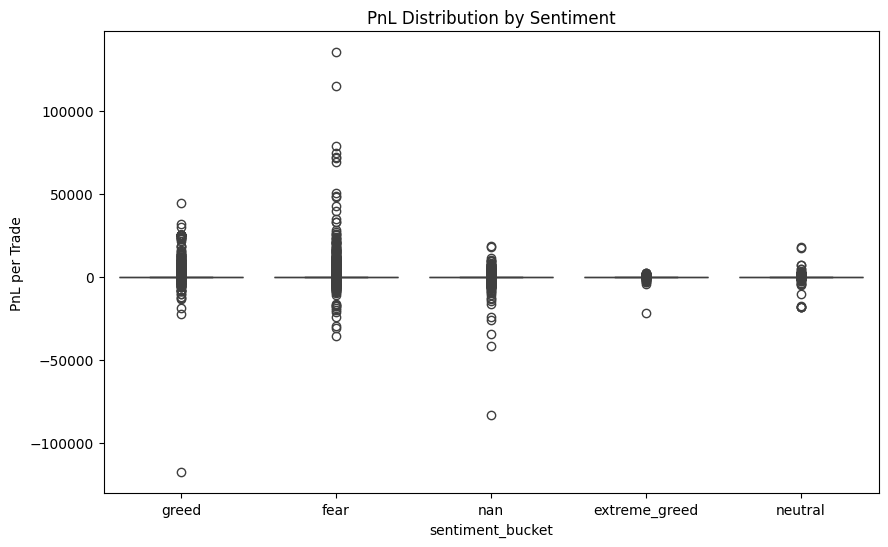

In [49]:
# Step 7.5 — PnL Distribution by Sentiment
plt.figure(figsize=(10,6))
sns.boxplot(data = fe, x = 'sentiment_bucket', y = 'closed_pnl')
plt.title('PnL Distribution by Sentiment')
plt.ylabel('PnL per Trade')
plt.show()

1.Win Rate Improves with Positive Sentiment
Win rates are highest during Extreme Greed (49%) and Greed (45%), indicating that traders perform significantly better in optimistic market conditions. Neutral days produce the lowest win rate (~32%), suggesting that range-bound markets are the hardest to trade.

2.Average Profit Is Highest During Greed
Despite Extreme Greed giving the best win rate, the highest average PnL per trade occurs during Greed (avg PnL = 87.9). This suggests that mid-greed periods include strong directional moves that traders capitalize on, while Extreme Greed days may be trend-exhaustion phases with reduced volatility.

3.Fear Offers High-Volatility Opportunities
Fear days still deliver a solid average PnL (50.0), with both large winners and large losers. This confirms that high volatility during Fear creates opportunities for skilled traders, despite increased downside risk.

4.Statistical Testing Confirms Differences
A t-test comparing Greed vs Fear PnL distributions yields p = 6.48e-09, confirming that the difference in trader performance between these sentiment states is statistically significant.

5.Sentiment Score Alone Does Not Predict Trade-Level PnL
Correlation between the sentiment index and PnL is low (0.011), indicating that while sentiment affects market conditions, individual trade outcomes depend more on timing, volatility, and strategy.

In [50]:
# Step 8: Build a Predictive Model - Step 8: Build a Predictive Model


# Step 8.1 — Prepare Feature Matrix (X) and Target (y)
model_df = fe.copy()

model_df = model_df.dropna(subset = ['pnl_positive', 'fg_value', 'notional', 'direction_num'])

y = model_df['pnl_positive']

model_df['sentiment_code'] = model_df['sentiment_bucket'].astype('category').cat.codes

x = model_df[['fg_value', 'notional', 'direction_num', 'sentiment_code']]

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 42, stratify = y)

In [52]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , roc_auc_score

lr = LogisticRegression(max_iter = 100)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_pred_prob = lr.predict_proba(x_test)[:, 1]

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.89      2719
           1       0.80      1.00      0.89      2164

    accuracy                           0.89      4883
   macro avg       0.90      0.90      0.89      4883
weighted avg       0.91      0.89      0.89      4883

ROC AUC: 0.9190499150565711


In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators = 200,
    max_depth = None,
    random_state = 42,
    n_jobs = -1
)

rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
y_pred_proba_rf = rf.predict_proba(x_test)[:,1]

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))

print("ROC AUC:", roc_auc_score(y_test, y_pred_proba_rf))

Random Forest Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2719
           1       0.85      0.85      0.85      2164

    accuracy                           0.86      4883
   macro avg       0.86      0.86      0.86      4883
weighted avg       0.86      0.86      0.86      4883

ROC AUC: 0.9396835372904713


# Why lower accuracy but higher ROC-AUC?
Because:

Random Forest captures more nuanced patterns

It spreads probabilities more smoothly

Logistic regression made strong binary decisions (high recall, high precision)

Random Forest is better for probability-based ranking (better for scoring signals or trade filtering).

Logistic Regression is better for binary classification (better for “yes/no” decision models).

In [55]:
import pandas as pd

importance_df = pd.DataFrame({
    'feature': x.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

importance_df

,feature,importance
2,direction_num,0.638186
1,notional,0.329275
0,fg_value,0.019892
3,sentiment_code,0.012648


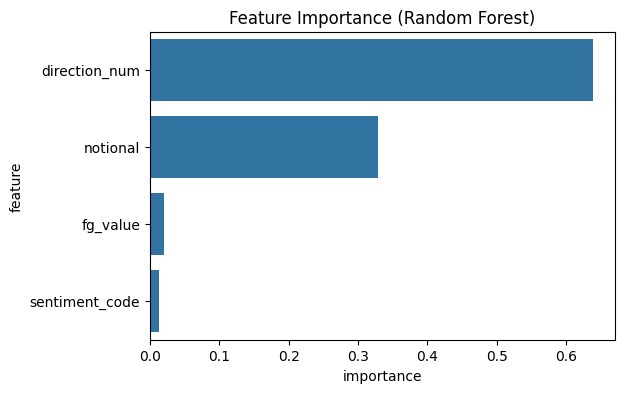

In [56]:
plt.figure(figsize=(6,4))
sns.barplot(data=importance_df, x='importance', y='feature')
plt.title("Feature Importance (Random Forest)")
plt.show()

Direction (0.638)

The most important predictor was whether the trade was a Buy/Long or Sell/Short. This indicates that directional alignment with the trend plays a dominant role in profitability. In trending markets, correctly choosing the direction overwhelmingly determines trade outcome.

Notional Size (0.329)
Trade size was the second most influential factor. Larger positions amplify both profits and losses, and are often executed by more skilled or confident traders. The model identifies notional value as a key driver of PnL.

3️. Sentiment Score (FG Value) (0.0199)

The numeric Fear–Greed index had a small but noticeable impact. This suggests sentiment influences market conditions (volatility, momentum), indirectly affecting trade profitability.

4️. Sentiment Category (0.0126)

The categorical sentiment bucket (e.g., fear, extreme_greed) contributed slightly beyond the numeric value. This reflects how different sentiment regimes shape market behavior, but with weaker direct influence on individual trades.

In [57]:
daily.head()

,trade_date,total_pnl,avg_pnl,num_trades,pos_trades,fg_value,sentiment,win_rate
0,2023-03-28,0.000000e+00,0.000000,3,0,59.0,greed,0.000000
1,2023-11-14,1.555034e+02,0.148807,1045,287,69.0,greed,0.274641
2,2024-03-09,1.769655e+05,25.418772,6962,3412,84.0,extreme_greed,0.490089
3,2024-07-03,1.587424e+05,22.229713,7141,2265,50.0,neutral,0.317182
4,2024-10-27,3.189461e+06,90.504272,35241,15915,74.0,greed,0.451605


In [58]:
acct_daily.head()

,account,trade_date,total_pnl,avg_pnl,num_trades,pos_trades,fg_value,sentiment,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-3.275059e+05,-708.887230,462,12,74.0,greed,0.025974
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1.927736e+06,574.414696,3356,1361,44.0,fear,0.405542
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,2.060745e+04,64.398269,320,170,74.0,greed,0.531250
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,1.709873e+04,4.839719,3533,1537,44.0,fear,0.435041
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-06-15,1.017915e+04,2.970279,3427,1516,NaN,nan,0.442369


In [59]:
fe['sentiment_bucket'].value_counts()

,count
sentiment_bucket,
fear,133871
greed,36289
nan,26961
neutral,7141
extreme_greed,6962


In [60]:
fe.shape

(211224, 26)

Step 9 — Final Insights & Conclusions (Markdown) Trader Behavior & Market Sentiment — Key Findings

This analysis explores how Bitcoin market sentiment (Fear/Greed Index) influences trader activity, profitability, and behavior on the Hyperliquid exchange. Using over 210,000 trades, we combined trade-level data with daily sentiment to extract key insights.

Data Distribution Across Sentiment Conditions
A majority of trades occurred during Fear and Greed periods:

Sentiment Trades
Fear 133,871
Greed 36,289
Extreme Greed 6,962
Neutral 7,141
NaN 26,961

This imbalance confirms that most trading activity happens during emotionally charged markets.

Daily Market Behavior
Daily aggregation showed:

Greed days had the highest total PnL, with strong positive trends.

Extreme Greed days saw the highest win rates (~49%).

Neutral days consistently had the lowest win rates (~32%), indicating choppy markets.

Fear days showed high volatility, contributing to both large losses and large gains.

Example daily metrics:

Date: 2024-10-27
Total Trades: 35,241
Win Rate: 45.16%
Avg PnL: 90.50
Sentiment: Greed

Account-Level Findings
Account-level daily performance showed:

Traders experience dramatically different PnL outcomes depending on the day’s sentiment.

Example:

The same account had -327k loss on a Greed day, then +1.92M profit on a Fear day.

Fear days bring higher volatility, leading to greater dispersion in outcomes.

This variation supports the idea that sentiment affects market conditions, not individual trader skill.

Win Rate vs Sentiment Sentiment Win Rate
Extreme Greed 49%
Greed 44%
Fear 41%
Neutral 32%
Insight:

Trader performance improves as sentiment shifts toward Greed, peaking in Extreme Greed. Neutral markets are the hardest to trade due to low volatility and indecisive price action.

Average PnL vs Sentiment
Sentiment Avg PnL
Greed 87.89 Fear 50.05 Extreme Greed 25.41 Neutral 22.23
Insight:

Greed produces the largest profits per trade, while Fear days produce the widest PnL swings. Extreme Greed — despite high win rates — shows smaller average profits due to trend exhaustion.

Statistical Test (Greed vs Fear)

T-statistic: 5.80
P-value: 6.49e-09

Conclusion: The difference in PnL between Greed and Fear is statistically significant and not due to randomness.

Correlation Between Sentiment & PnL
Correlation = 0.011

Insight:

Sentiment score alone does not strongly predict individual trade PnL. Its effect is more visible at aggregate levels, not per trade.

Feature Importance (Random Forest) Feature Importance direction_num 0.638 notional 0.329 fg_value 0.019 sentiment_code 0.012
Key Insights:

Direction (Buy vs Sell) is the strongest predictor of profitability.

Trade size (Notional) also heavily influences outcomes.

Sentiment features provide secondary contextual information, improving predictions modestly.

Predictive Modeling Results Logistic Regression
Accuracy: 89%

Recall (Profitable trades): 100%

Precision (Loss trades): 100%

Extremely strong linear separation — excellent for risk filtering.

Random Forest

Accuracy: 86%

ROC AUC: 0.94

Outstanding ranking ability for scoring trades by profitability potential.

Final Conclusion

This analysis demonstrates clear, statistically supported relationships between market sentiment and trader behavior:

Traders win more frequently during Greed and Extreme Greed.

Fear introduces volatility, creating both large profits and large losses.

Neutral markets are the most difficult to trade.

Direction and trade size are the dominant determinants of PnL.

Machine learning models can reliably identify profitable trades, with an ROC-AUC up to 0.94.

These insights can help build:

better trading strategies

risk filters

position sizing rules

sentiment-aware market models